# Manipulating Images

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### Download the images for the lab

In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png -O cat.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png

--2022-08-05 14:51:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 663451 (648K) [image/png]
Saving to: ‘cat.png’

cat.png             100%[===================>] 647.90K   383KB/s    in 1.7s    

2022-08-05 14:51:40 (383 KB/s) - ‘cat.png’ saved [663451/663451]

--2022-08-05 14:51:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.

### Copying Images

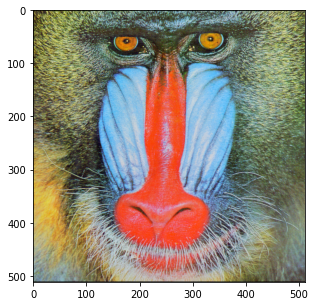

In [3]:
baboon = np.array(Image.open('baboon.png'))
plt.figure(figsize=(5,5))
plt.imshow(baboon)
plt.show()

In [4]:
A = baboon

In [5]:
id(A) == id(baboon)

True

In [6]:
B = baboon.copy()
id(B) == id(baboon)

False

In [7]:
baboon[:,:,] = 0

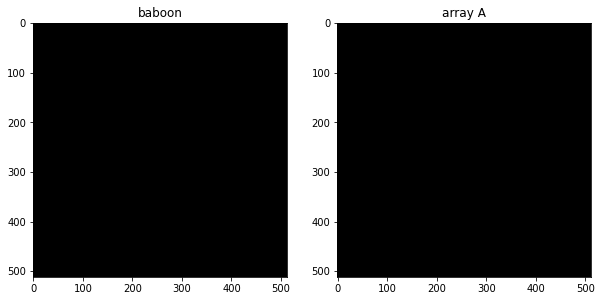

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(A)
plt.title("array A")
plt.show()

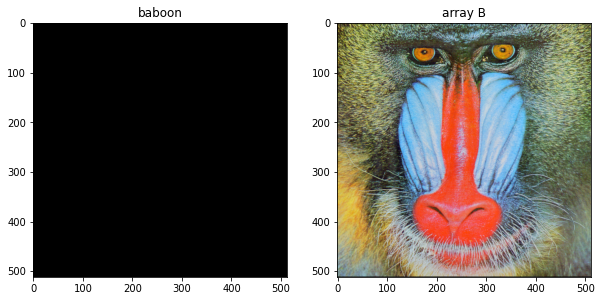

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(B)
plt.title("array B")
plt.show()

### Flipping Images

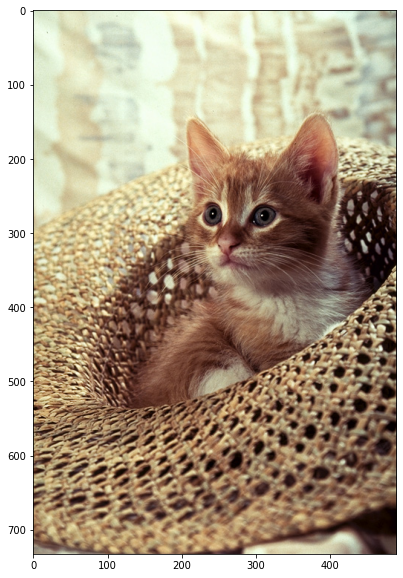

In [10]:
image = Image.open("cat.png")
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [11]:
array = np.array(image)
width, height, C = array.shape
print('width, height, C', width, height, C)

width, height, C 733 490 3


In [12]:
array_flip = np.zeros((width, height, C), dtype=np.uint8)

In [13]:
for i, row in enumerate(array):
    array_flip[width - 1 - i, :, :] = row

In [14]:
from PIL import ImageOps

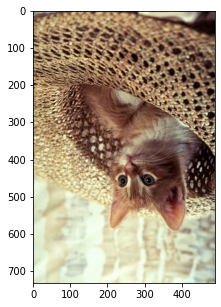

In [15]:
im_flip = ImageOps.flip(image)
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

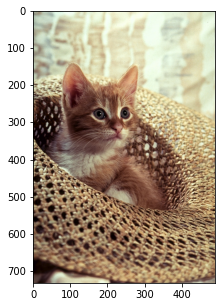

In [16]:
im_mirror = ImageOps.mirror(image)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

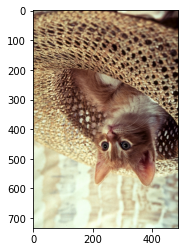

In [17]:
im_flip = image.transpose(1)
plt.imshow(im_flip)
plt.show()

In [18]:
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
       "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
       "ROTATE_90": Image.ROTATE_90,
       "ROTATE_180": Image.ROTATE_180,
       "ROTATE_270": Image.ROTATE_270,
       "TRANSPOSE": Image.TRANSPOSE,
       "TRANSVERSE": Image.TRANSVERSE}

In [19]:
flip["FLIP_LEFT_RIGHT"]

0

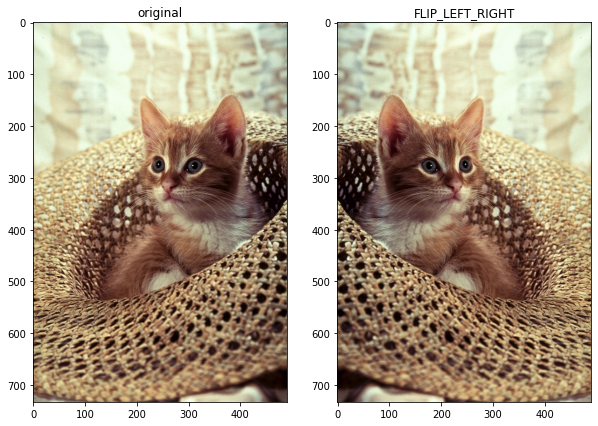

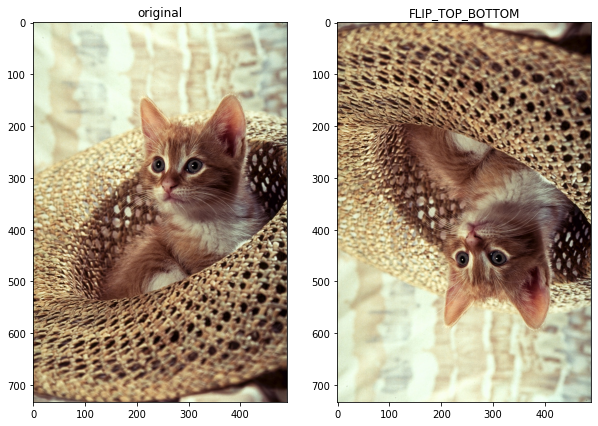

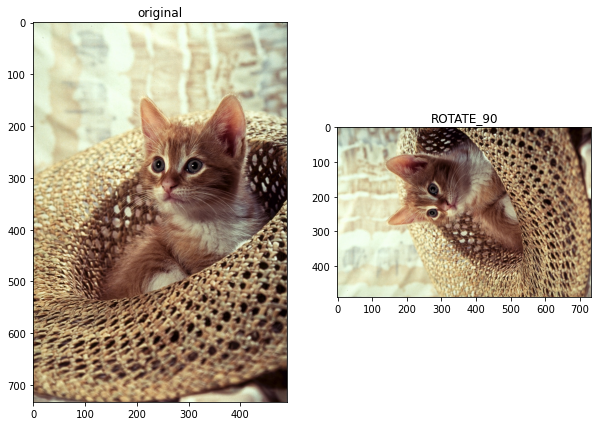

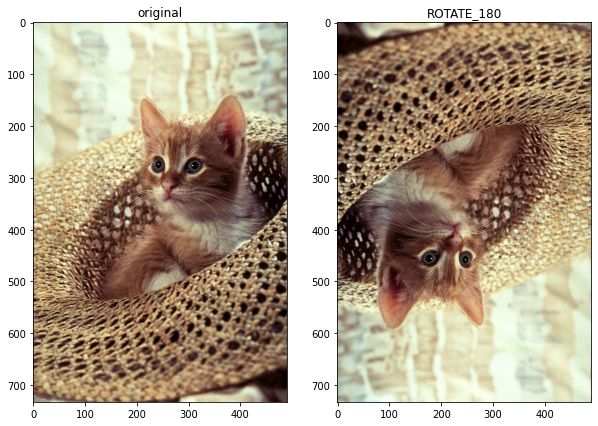

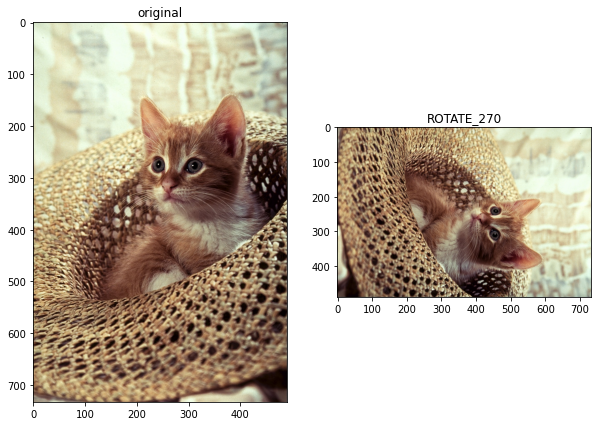

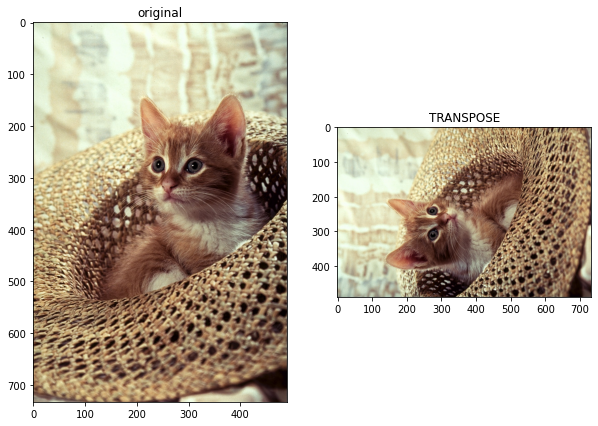

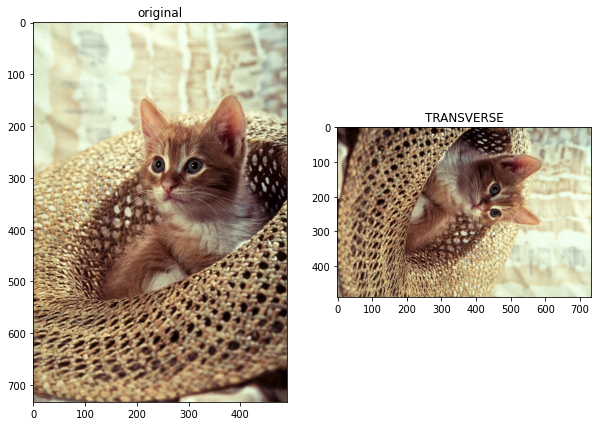

In [20]:
for key, values in flip.items():
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("original")
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

### Cropping an Image

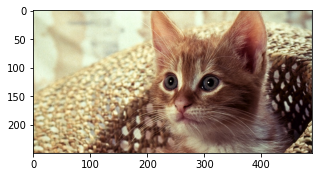

In [21]:
upper = 150
lower = 400
crop_top = array[upper: lower,:,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

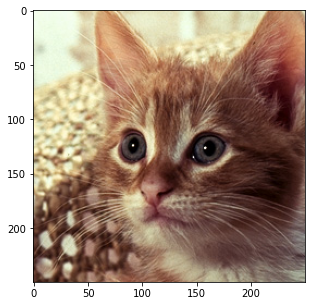

In [22]:
left = 150
right = 400
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

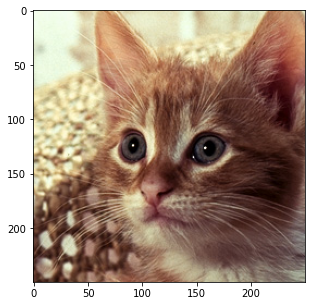

In [23]:
image = Image.open("cat.png")
crop_image = image.crop((left, upper, right, lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_image)
plt.show()

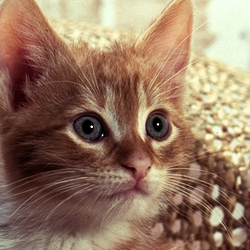

In [24]:
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

### Changing Specific Image Pixels

In [25]:
array_sq = np.copy(array)
array_sq[upper:lower, left:right, 1:2] = 0

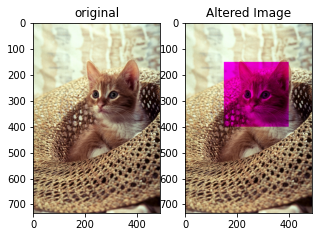

In [26]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title('Altered Image')
plt.show()

In [27]:
from PIL import ImageDraw

In [28]:
image_draw = image.copy()

In [29]:
image_fn = ImageDraw.Draw(im=image_draw)

In [30]:
shape = [left, upper, right, lower]
image_fn.rectangle(xy=shape,fill="red")

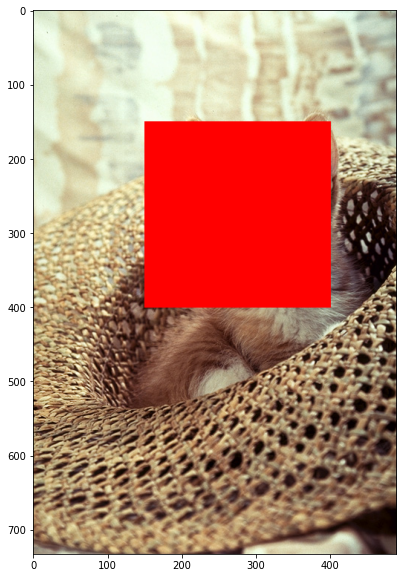

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

In [32]:
from PIL import ImageFont

In [33]:
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))

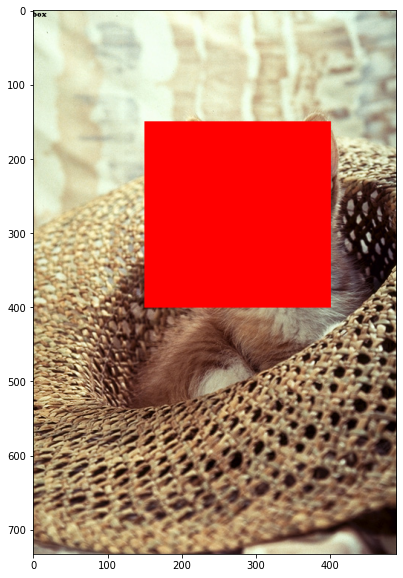

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

In [35]:
image_lenna = Image.open("lenna.png")
array_lenna = np.array(image_lenna)

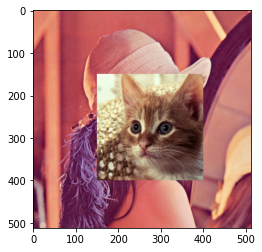

In [36]:
array_lenna[upper:lower, left:right, :]=array[upper:lower, left:right, :]
plt.imshow(array_lenna)
plt.show()

In [37]:
image_lenna.paste(crop_image, box=(left,upper))

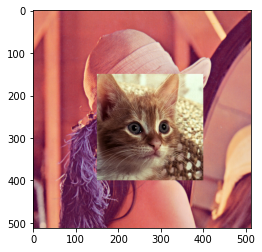

In [38]:
plt.imshow(image_lenna)
plt.show()

In [39]:
image = Image.open("cat.png")
new_image=image
copy_image=image.copy()

In [40]:
id(image) == id(new_image)

True

In [41]:
id(image) == id(copy_image)

False

In [42]:
image_fn = ImageDraw.Draw(im=image)
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))
image_fn.rectangle(xy=shape,fill="red")

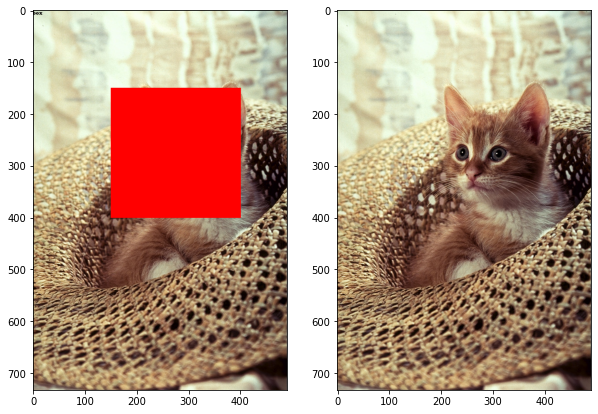

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(new_image)
plt.subplot(122)
plt.imshow(copy_image)
plt.show()

### Question 1:

In [44]:
# Open the image and create a PIL Image object called im, flip im and create an image called 
# im_flip. Mirror im and create an image called im_mirror. Finally, plot both images.

im = Image.open("baboon.png")
im_flip = ImageOps.flip(im)
im_mirror = ImageOps.mirror(im)

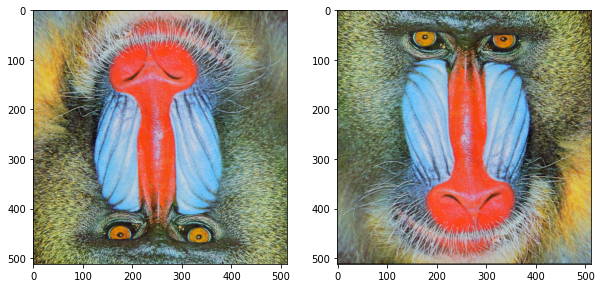

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im_flip)
plt.subplot(122)
plt.imshow(im_mirror)
plt.show()